<a href="https://colab.research.google.com/github/mmassonn/breast_cancer_prediction/blob/main/breast_cancer_prediction_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet : Breast cancer prediction


##I. Définir l'objectif

Objectif : Prédiction du risque de développer un cancer du sein à partir des données de morphologie cellulaire

metrique : F1 score

##II. Importer les bibliothèques/framework

In [1]:
#import pre-processing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
#import evaluation packages
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve

In [3]:
#Connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##III. Load data

In [4]:
#load data
df = pd.read_csv('drive/MyDrive/Projet_2022/breast_cancer_prediction/dataset.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#IV. Pre-processing

In [6]:
#remove id and Unamed columns
df = df.drop(['id','Unnamed: 32'], axis=1)

##1.Diviser la base de donnée

In [7]:
#split Train and Test set  
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)

##2.Répartition des différentes variables

###a.cible

In [8]:
#target vizualisation
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [9]:
train_set['diagnosis'].value_counts(normalize = True)

B    0.637363
M    0.362637
Name: diagnosis, dtype: float64

In [10]:
test_set['diagnosis'].value_counts(normalize = True)

B    0.587719
M    0.412281
Name: diagnosis, dtype: float64

###b.variables qualitatives

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

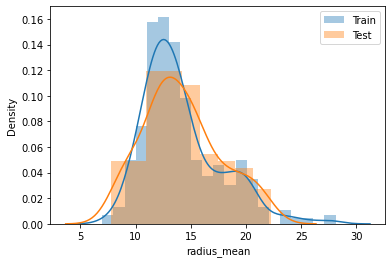

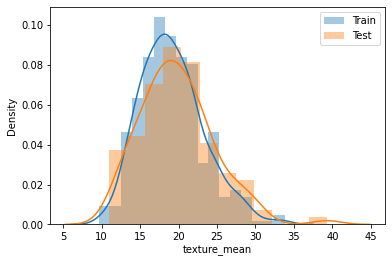

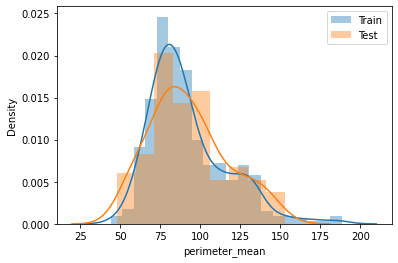

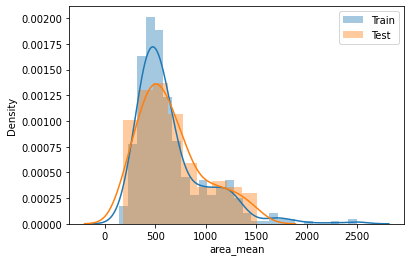

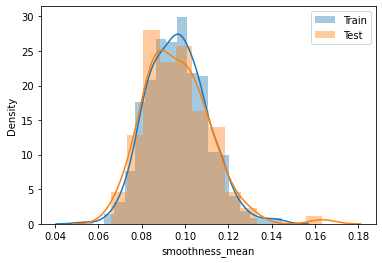

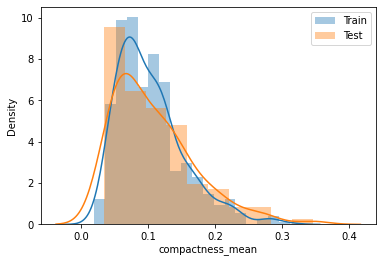

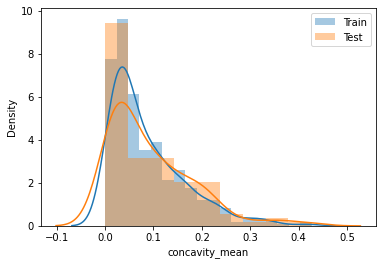

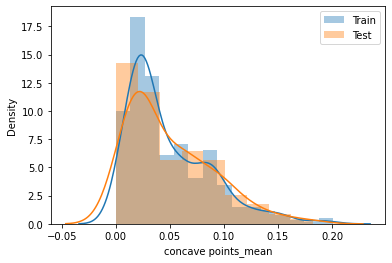

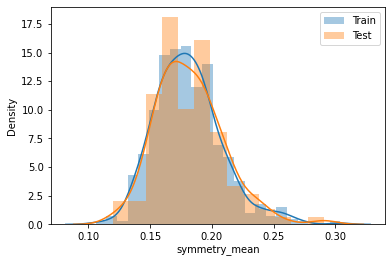

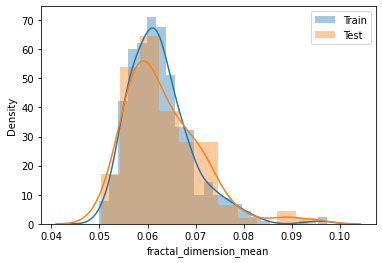

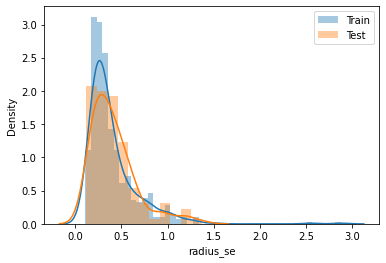

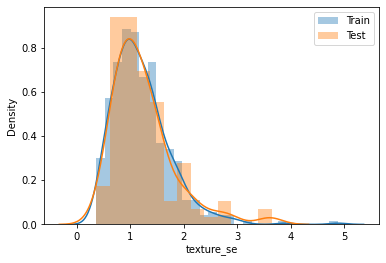

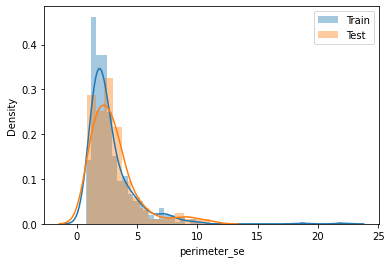

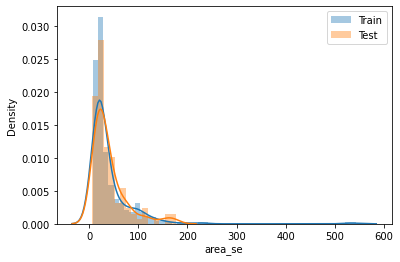

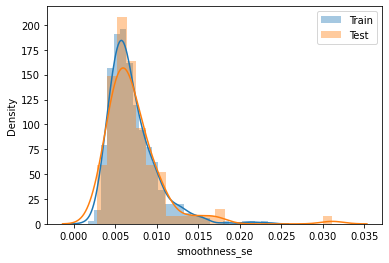

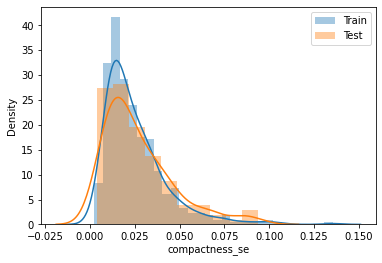

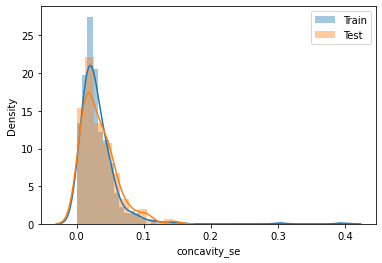

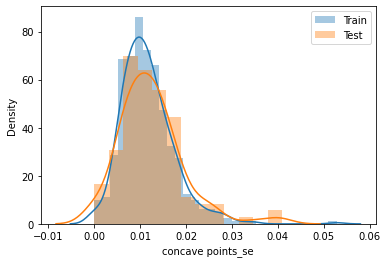

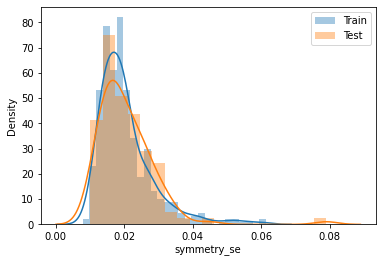

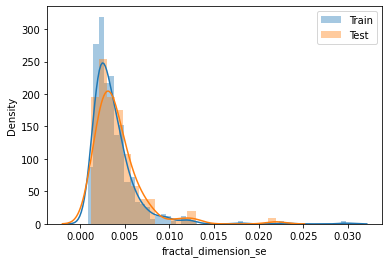

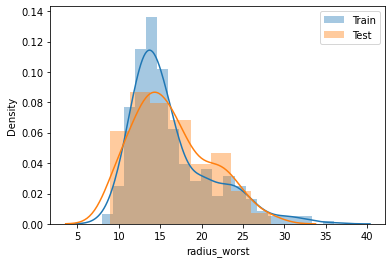

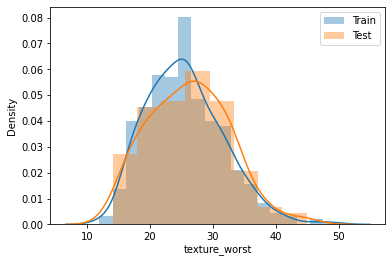

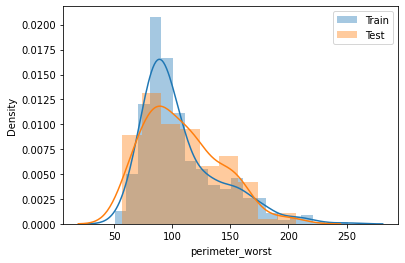

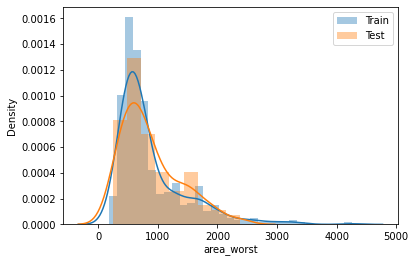

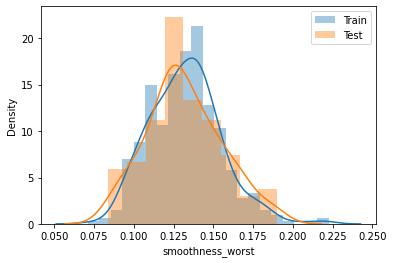

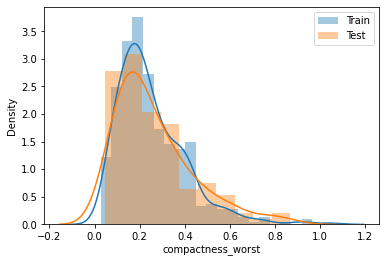

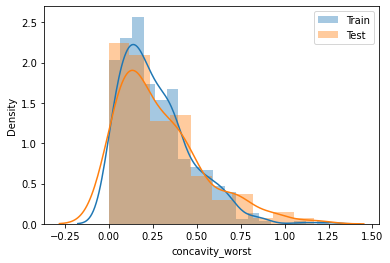

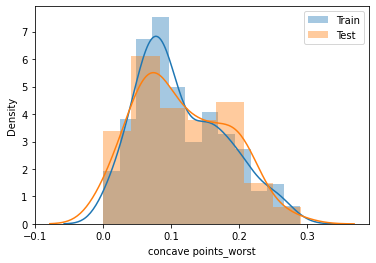

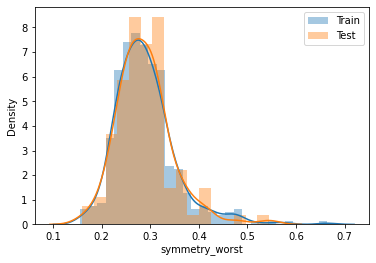

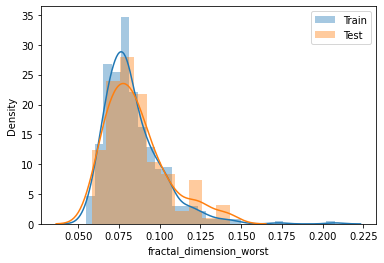

In [11]:
#target/feature_df :
for col in df.drop('diagnosis', axis=1):
    plt.figure()
    sns.distplot(train_set[col], label='Train')
    sns.distplot(test_set[col], label ='Test')
    plt.legend()  

**Conclusion :** La répartition des différentes variables est homogène.

##3.Normalisation des variables

###a.Normalisation standard des variables quantitatives

In [12]:
#normalisazion
def make_standard_normal(df):
    df = df.drop('diagnosis', axis=1)
    #calculate the mean and standard deviation of the training set
    mean = df.mean(axis = 0)
    stdev = df.std(axis = 0)
    # standardize the training set
    df = (df-mean)/stdev
    return df

###b.Encodage des variables quantitatives

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#encodage function
def encodage_function(df):
  df = df['diagnosis']
  encoder = LabelEncoder()
  df = pd.DataFrame(encoder.fit_transform(df))
  return df

###c.Fonction pré-processing

In [15]:
#defined pre-processing    
def preprocessing(df):
  df1 = make_standard_normal(df)
  df2 = encodage_function(df)
  X = df1
  Y = df2
  return X,Y

In [16]:
#applied pre-processing
X_train, y_train = preprocessing(train_set)
X_test, y_test = preprocessing(test_set)

#V. Modelling

###1.Boosting

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train.values.ravel())
y_preds = model.predict(X_test)

print('F1 Score - AdaBoostClassifier:', f1_score(y_test, y_preds)) 

F1 Score - AdaBoostClassifier: 0.9565217391304347


###2.Tuner les hyperparmètres

Adaboost peut être parfois difficile à régler car il se compose de nombreux **hyperparamètres**. 

L'utilisation de **GridSearchCV** est toujours une approche intelligente. Les processus de recherche populaires incluent une recherche aléatoire et une recherche par grille.

Dans mon cas, je recherche par grille deux hyperparamètres clés pour AdaBoost : le nombre d'arbres utilisés dans l'ensemble et le taux d'apprentissage. J'utilise une gamme de valeurs populaires performantes pour chaque hyperparamètre.


Chaque combinaison de configuration sera évaluée à l'aide d'une validation croisée répétée k-fold et les configurations seront comparées à l'aide du score moyen, dans ce cas, le score f1.

**Rechercher les meilleurs hyperparamètres**

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [38]:
# define the model with default hyperparameters
model = AdaBoostClassifier()

In [39]:
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500, 1000, 5000]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [40]:
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [41]:
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1')

In [42]:
# execute the grid search
grid_result = grid_search.fit(X_train, y_train.values.ravel(), verbose=2)

In [43]:
# summarize the best score and configuration
print("Best F1 score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best F1 score: 0.955168 using {'learning_rate': 1.0, 'n_estimators': 1000}


**Entrainement + Prédiction**

In [47]:
model = AdaBoostClassifier(learning_rate=1.0, n_estimators=1000)
model.fit(X_train, y_train.values.ravel())
y_preds = model.predict(X_test)

print('F1 Score - AdaBoostClassifier:', f1_score(y_test, y_preds)) 

F1 Score - AdaBoostClassifier: 0.967032967032967
